<a href="https://colab.research.google.com/github/akshayaxo/FinalProject/blob/main/ProjectFinalCopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymatreader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from pymatreader import read_mat

  Created wheel for pymatreader: filename=pymatreader-0.0.26-py3-none-any.whl size=8689 sha256=2c7681a2e210f24340751e4a1300cbba39584672d70c61e48e7a0282e23a8e78
  Stored in directory: /root/.cache/pip/wheels/75/46/9c/065361ed8d993ff3f69637d0e9ad3513039153bc322ff6361a
Successfully built pymatreader


## **Fetch Data**

In [ ]:
drive.mount('/content/drive')
data = read_mat('/content/drive/My Drive/Training_data_MSc.mat')

Mounted at /content/drive


In [ ]:
df1 = pd.DataFrame(data['overall_ref_data_rates_mat_D'])
df2 = pd.DataFrame(data['overal_TPM_yearly_prod_diff_percent_mat_2D'])
df1=df1.transpose()
df2=df2.transpose()

## **Scalling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df1)
df1=scaler.transform(df1)
print(df1.shape)
print(df2.shape)

(36000, 366)
(36000, 4)


## **Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(df1, df2, test_size = 0.3)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25200, 366)
(25200, 4)
(10800, 366)
(10800, 4)


## **Function for classification**

In [ ]:
def traindataset(df2):
    X=[]
    for x in range(df2.shape[0]):
        smallest = 0
        index = 0
        for y in range(df2.shape[1]):
            if(abs(df2[x,y])<=2):
                if(smallest==0):
                    smallest= df2[x,y]
                    index = y
                else:
                    if(abs(smallest) > abs(df2[x,y])):
                        smallest = df2[x,y]
                        index = y
        if(smallest == 0):
            X.append(int(5)) 
        else:
            X.append(int(index + 1))
    return X

## **LinearRegression**

In [ ]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(x_test)
y_prediction

array([[ -4.45638183,  -2.25138013,   1.52940659,  -5.61234005],
       [  1.84299177,  -0.33350723,   0.10377706,  -0.36233046],
       [  1.09404883,  -1.01232127,   2.11596232,  -0.8392452 ],
       ...,
       [  1.72505791,  -0.16989939,   0.28245608,   0.56962584],
       [ -2.01462215,  -1.4231094 ,  -3.04353197,   3.37595023],
       [-11.60404535,  -0.56316208,   1.58683098,  -0.23428522]])

In [ ]:
y_test = np.array(y_test)
print(type(y_test))
print(type(y_prediction))
classified_test=traindataset(y_test)
print(classified_test)
classified_pred1=traindataset(y_prediction)
print(classified_pred1)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[2, 3, 1, 4, 4, 4, 4, 5, 1, 3, 3, 1, 3, 3, 1, 5, 1, 1, 4, 4, 4, 2, 1, 2, 4, 5, 2, 3, 1, 2, 2, 4, 4, 4, 3, 3, 3, 2, 1, 5, 4, 2, 5, 3, 3, 2, 3, 4, 4, 5, 4, 1, 3, 3, 3, 4, 4, 1, 3, 4, 5, 5, 5, 2, 4, 5, 1, 2, 5, 4, 3, 1, 3, 4, 3, 3, 4, 2, 3, 1, 4, 2, 5, 4, 2, 2, 4, 1, 3, 4, 1, 3, 4, 3, 4, 3, 4, 2, 5, 3, 3, 5, 3, 1, 3, 4, 4, 4, 1, 3, 5, 3, 2, 4, 2, 1, 1, 2, 5, 5, 3, 3, 2, 4, 5, 3, 4, 4, 1, 3, 3, 2, 4, 1, 4, 1, 3, 3, 2, 4, 3, 4, 3, 4, 5, 2, 4, 3, 2, 3, 4, 1, 3, 5, 2, 3, 1, 3, 4, 5, 5, 4, 5, 2, 2, 4, 5, 2, 5, 3, 5, 3, 2, 1, 3, 3, 3, 5, 2, 2, 2, 4, 5, 1, 3, 4, 4, 5, 4, 4, 1, 2, 2, 3, 4, 2, 5, 1, 4, 5, 5, 2, 5, 5, 1, 3, 4, 2, 4, 4, 3, 4, 2, 3, 5, 2, 3, 3, 4, 4, 2, 5, 5, 3, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 2, 4, 3, 4, 3, 5, 3, 3, 4, 5, 3, 3, 3, 3, 2, 4, 3, 5, 3, 5, 2, 5, 5, 5, 4, 5, 4, 1, 3, 3, 2, 5, 4, 4, 5, 5, 4, 4, 2, 2, 2, 3, 3, 4, 5, 2, 3, 5, 5, 3, 2, 4, 4, 3, 4, 1, 1, 4, 4, 3, 3, 1, 3, 4, 3, 5, 3, 3, 4, 2, 4, 2, 5, 4, 4, 2, 5, 2, 4, 3, 4, 5, 5, 

In [ ]:
from sklearn.metrics import accuracy_score

score =accuracy_score(classified_test,classified_pred1)
print('Accuracy socre is ',score)
print(LR.score(x_test,y_test))

Accuracy socre is  0.5917592592592592
0.8297778891640245


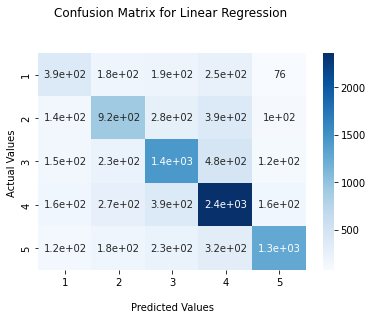

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Generate the confusion matrix
cf_matrix = confusion_matrix(classified_test,classified_pred1)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for Linear Regression \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['1','2','3','4','5'])
ax.yaxis.set_ticklabels(['1','2','3','4','5'])

## Display the visualization of the Confusion Matrix.
plt.show()

## **MLPRegressor Model**

In [ ]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(activation='tanh', alpha= 0.05, hidden_layer_sizes= (50, 50, 50), learning_rate= 'adaptive', solver= 'adam', max_iter=500).fit(x_train, y_train)
y_pred=regr.predict(x_test)

In [ ]:
print(classified_test)
classified_pred1=traindataset(y_pred)
print(classified_pred1)

[2, 3, 1, 4, 4, 4, 4, 5, 1, 3, 3, 1, 3, 3, 1, 5, 1, 1, 4, 4, 4, 2, 1, 2, 4, 5, 2, 3, 1, 2, 2, 4, 4, 4, 3, 3, 3, 2, 1, 5, 4, 2, 5, 3, 3, 2, 3, 4, 4, 5, 4, 1, 3, 3, 3, 4, 4, 1, 3, 4, 5, 5, 5, 2, 4, 5, 1, 2, 5, 4, 3, 1, 3, 4, 3, 3, 4, 2, 3, 1, 4, 2, 5, 4, 2, 2, 4, 1, 3, 4, 1, 3, 4, 3, 4, 3, 4, 2, 5, 3, 3, 5, 3, 1, 3, 4, 4, 4, 1, 3, 5, 3, 2, 4, 2, 1, 1, 2, 5, 5, 3, 3, 2, 4, 5, 3, 4, 4, 1, 3, 3, 2, 4, 1, 4, 1, 3, 3, 2, 4, 3, 4, 3, 4, 5, 2, 4, 3, 2, 3, 4, 1, 3, 5, 2, 3, 1, 3, 4, 5, 5, 4, 5, 2, 2, 4, 5, 2, 5, 3, 5, 3, 2, 1, 3, 3, 3, 5, 2, 2, 2, 4, 5, 1, 3, 4, 4, 5, 4, 4, 1, 2, 2, 3, 4, 2, 5, 1, 4, 5, 5, 2, 5, 5, 1, 3, 4, 2, 4, 4, 3, 4, 2, 3, 5, 2, 3, 3, 4, 4, 2, 5, 5, 3, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 2, 4, 3, 4, 3, 5, 3, 3, 4, 5, 3, 3, 3, 3, 2, 4, 3, 5, 3, 5, 2, 5, 5, 5, 4, 5, 4, 1, 3, 3, 2, 5, 4, 4, 5, 5, 4, 4, 2, 2, 2, 3, 3, 4, 5, 2, 3, 5, 5, 3, 2, 4, 4, 3, 4, 1, 1, 4, 4, 3, 3, 1, 3, 4, 3, 5, 3, 3, 4, 2, 4, 2, 5, 4, 4, 2, 5, 2, 4, 3, 4, 5, 5, 3, 3, 4, 3, 2, 5, 4, 5, 1, 3, 3, 5, 5, 3, 5, 4, 

In [ ]:
score =accuracy_score(classified_test,classified_pred1)
print('Accuracy socre of MLP is ',score)
print(regr.score(x_test,y_test))

Accuracy socre of MLP is  0.6037962962962963
0.9466699935976308


[[ 456  157  184  212   82]
 [ 168 1006  263  307   94]
 [ 164  290 1424  406  125]
 [ 185  402  467 2074  210]
 [  96  110  136  221 1561]]


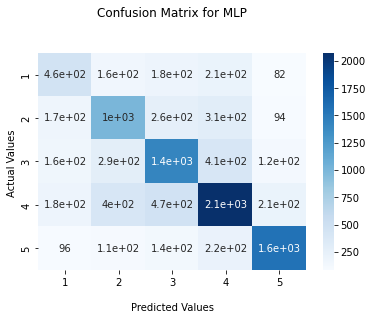

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(classified_test,classified_pred1)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for MLP\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['1','2','3','4','5'])
ax.yaxis.set_ticklabels(['1','2','3','4','5'])

## Display the visualization of the Confusion Matrix.
plt.show()

# **Hyperparameter Tunning For MLP**

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator=MLPRegressor()

param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']}

gsc = GridSearchCV(
    estimator,
    param_grid,
    cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(x_train, y_train)


best_params = grid_result.best_params_

KeyboardInterrupt: ignored

## **GaussianProcessRegressor**

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,DotProduct,ConstantKernel,RationalQuadratic, ExpSineSquared,WhiteKernel

kernel  = DotProduct() + WhiteKernel()
#kernel = 1*RBF(1.0)

#kernel after optimization
gp_reg = GaussianProcessRegressor(kernel=kernel,
                                    random_state=42,
                                  optimizer= None 
                                 )

AttributeError: ignored

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df1, df2, test_size = 0.5)
gp_model = gp_reg.fit(X_train,Y_train)
ypred = gp_reg.predict(X_test)

In [ ]:
Y_test = np.array(Y_test)
classified_test=traindataset(Y_test)
classified_pred3=traindataset(ypred)
print(classified_test)
print(classified_pred3)

[5, 4, 4, 5, 5, 4, 4, 3, 2, 2, 4, 4, 4, 4, 5, 3, 5, 2, 5, 3, 1, 5, 1, 1, 4, 3, 4, 3, 1, 1, 3, 4, 5, 2, 2, 4, 4, 3, 2, 4, 4, 3, 2, 2, 3, 4, 4, 1, 3, 1, 2, 3, 5, 5, 2, 3, 2, 3, 5, 4, 2, 4, 3, 4, 5, 4, 4, 3, 5, 4, 5, 5, 3, 3, 4, 4, 2, 2, 2, 3, 5, 5, 5, 5, 1, 4, 5, 2, 5, 2, 3, 5, 5, 4, 4, 2, 3, 3, 5, 4, 4, 2, 5, 3, 3, 4, 3, 3, 4, 2, 1, 3, 5, 4, 2, 3, 2, 3, 4, 4, 5, 5, 5, 4, 3, 2, 2, 4, 2, 5, 5, 1, 5, 4, 1, 5, 1, 5, 2, 4, 1, 1, 4, 1, 2, 1, 1, 1, 5, 5, 3, 5, 5, 3, 1, 5, 5, 4, 4, 2, 3, 3, 2, 5, 3, 4, 3, 5, 3, 2, 5, 3, 3, 1, 4, 2, 3, 1, 2, 2, 5, 2, 3, 5, 5, 5, 4, 1, 4, 5, 4, 2, 4, 1, 4, 2, 5, 3, 5, 3, 3, 3, 5, 3, 1, 5, 5, 4, 3, 4, 4, 4, 5, 2, 4, 5, 5, 4, 4, 1, 1, 3, 3, 4, 4, 3, 2, 5, 2, 5, 4, 5, 4, 2, 3, 3, 4, 3, 2, 2, 4, 4, 1, 4, 4, 5, 4, 4, 3, 3, 4, 3, 4, 5, 2, 3, 4, 1, 5, 5, 5, 4, 1, 4, 3, 1, 1, 4, 5, 2, 5, 4, 4, 5, 5, 3, 4, 4, 3, 2, 5, 2, 5, 3, 4, 3, 5, 1, 4, 5, 3, 4, 3, 4, 5, 5, 2, 2, 2, 3, 5, 4, 4, 4, 3, 5, 5, 4, 3, 2, 5, 5, 2, 5, 4, 2, 4, 1, 3, 5, 3, 1, 4, 2, 4, 5, 4, 4, 5, 3, 4, 4, 3, 

In [ ]:
from sklearn.metrics import accuracy_score
score =accuracy_score(classified_test,classified_pred3)
print('Accuracy socre GP is ',score)

Accuracy socre GP is  0.5852222222222222


In [ ]:
print(gp_model.score(X_test,Y_test))

Accuracy socre GP is  0.5869444444444445


[[ 588  302  338  367  121]
 [ 229 1506  477  680  159]
 [ 245  366 2351  876  186]
 [ 257  440  669 3934  237]
 [ 208  305  412  592 2155]]


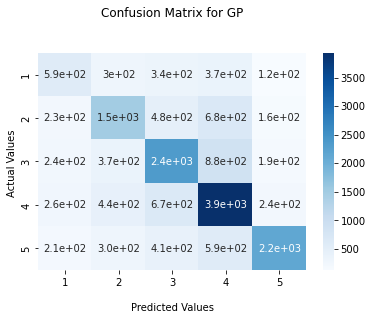

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(classified_test,classified_pred3)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for GP\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['1','2','3','4','5'])
ax.yaxis.set_ticklabels(['1','2','3','4','5'])

## Display the visualization of the Confusion Matrix.
plt.show()

## **LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot

x_train1 = x_train.reshape(-1, 1, 366)
x_test1  = x_test.reshape(-1, 1, 366)


In [ ]:
# design network
model = Sequential()
model.add(LSTM(100,input_shape=(1, 366)))
model.add(Dense(4,activation='softmax'))
model.compile(optimizer='adam', loss='mse', metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               186800    
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 187,204
Trainable params: 187,204
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
788/788 - 10s - loss: 35.2096 - accuracy: 0.3019 - val_loss: 34.9871 - val_accuracy: 0.4096 - 10s/epoch - 13ms/step
Epoch 2/50
788/788 - 4s - loss: 34.9935 - accuracy: 0.3706 - val_loss: 34.7668 - val_accuracy: 0.4085 - 4s/epoch - 6ms/step
Epoch 3/50
788/788 - 4s - loss: 34.7330 - accuracy: 0.4109 - val_loss: 34.5731 - val_accuracy: 0.4310 - 4s/epoch - 6ms/step
Epoch 4/50
788/788 - 5s - loss: 34.3485 - accuracy: 0.4832 - val_loss: 34.2419 - val_accuracy: 0.4663 - 5s/epoch - 6ms/step
Epoch 5/50
788/788 - 5s - loss: 34.1163 - accuracy: 0.5264 - val_loss: 34.0832 - val_accuracy: 0.4830 - 5s/epoch - 6ms/step
Epoch 6/50
788/788 - 5s - loss: 33.9822 - accuracy: 0.5592 - val_loss: 33.9373 - val_accuracy: 0.5270 - 5s/epoch - 6ms/step
Epoch 7/50
788/788 - 5s - loss: 33.8617 - accuracy: 0.5940 - val_loss: 33.8624 - val_accuracy: 0.5402 - 5s/epoch - 6ms/step
Epoch 8/50
788/788 - 4s - loss: 33.7688 - accuracy: 0.6229 - val_loss: 33.7783 - val_accuracy: 0.5566 - 4s/epoch - 5ms/step
Epoch

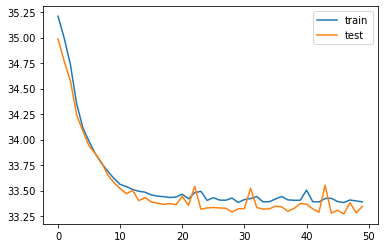

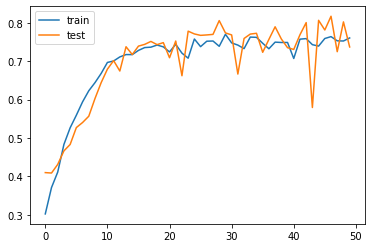

In [ ]:
# fit network
history = model.fit(x_train1, y_train, epochs=50,validation_data=(x_test1,y_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
yhat = model.predict(x_test1)
print(yhat)
print(y_test)
print(classified_test)
classified_pred1=traindataset(yhat)
print(classified_pred1)

[[1.6216138e-05 1.7772449e-02 9.8221117e-01 1.6726473e-07]
 [9.7304189e-01 2.2159571e-02 8.9467526e-04 3.9038304e-03]
 [9.6603829e-01 8.2156956e-03 2.5216183e-02 5.2981568e-04]
 ...
 [8.9184213e-01 9.7859420e-02 3.8413218e-05 1.0260131e-02]
 [3.2433789e-04 8.5355103e-04 5.7481704e-09 9.9882203e-01]
 [2.8573460e-13 5.8851406e-02 8.8512647e-01 5.6022137e-02]]
[[ -5.00228421  -1.97390674   3.54524936  -9.90811492]
 [  2.64191127  -1.94151957  -0.86706431  -1.85420979]
 [  0.92231461  -1.3690921    1.63037026  -2.00077757]
 ...
 [  0.08367673   0.4350279    0.14874414  -0.35690317]
 [  0.33647057  -0.15096427  -1.07536819   2.43366068]
 [-16.0602416    1.62143419   2.94763197   0.23512461]]
[5, 4, 4, 5, 5, 4, 4, 3, 2, 2, 4, 4, 4, 4, 5, 3, 5, 2, 5, 3, 1, 5, 1, 1, 4, 3, 4, 3, 1, 1, 3, 4, 5, 2, 2, 4, 4, 3, 2, 4, 4, 3, 2, 2, 3, 4, 4, 1, 3, 1, 2, 3, 5, 5, 2, 3, 2, 3, 5, 4, 2, 4, 3, 4, 5, 4, 4, 3, 5, 4, 5, 5, 3, 3, 4, 4, 2, 2, 2, 3, 5, 5, 5, 5, 1, 4, 5, 2, 5, 2, 3, 5, 5, 4, 4, 2, 3, 3, 5, 4, 4, 

In [ ]:
classified_test=traindataset(y_test)

In [ ]:
score =accuracy_score(classified_test,classified_pred1)
print('Accuracy socre of LSTM is ',score)

Accuracy socre of LSTM is  0.1824074074074074


[[  93  177  602  219    0]
 [ 398  114  913  413    0]
 [ 673  207 1128  400    1]
 [1000  269 1437  629    3]
 [ 643  231  595  649    6]]


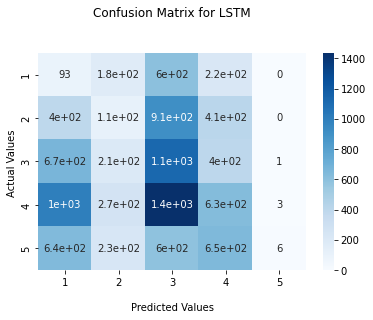

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(classified_test,classified_pred1)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for LSTM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['1','2','3','4','5'])
ax.yaxis.set_ticklabels(['1','2','3','4','5'])

## Display the visualization of the Confusion Matrix.
plt.show()